In [1]:
import numpy as np
from math import pi,sqrt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.aqua.components.optimizers import COBYLA

In [2]:
initial_state = [complex(0,sqrt(1/2)), sqrt(1/2)]

In [3]:
def circuit(para):
    qc = QuantumCircuit(3,1)
    qc.u3(para[0],para[1],para[2],1)
    qc.initialize(initial_state, 2)
    return qc
def swap_test_cost(qc):
    qc1 = QuantumCircuit(3,1)
    qc1 += qc
    qc1.h(0)
    qc1.cswap(0,1,2)
    qc1.h(0)
    qc1.measure(0,0)
    backend = Aer.get_backend('qasm_simulator')
    count = execute(qc1,backend,shots=1024).result().get_counts()
    result = count['0']/sum(count.values())
    return - result
def obj_fun(para):
    qc = circuit(para)
    
    cost = swap_test_cost(qc)
    
    return cost


In [4]:
para = np.random.rand(3)*pi
optimizer = COBYLA(maxiter=1200)
result = optimizer.optimize(num_vars=3, objective_function = obj_fun, initial_point=para)
print(result[1])
tar = circuit(result[0])


<ipython-input-3-0cf6ee28b327>:3: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(para[0],para[1],para[2],1)


-1.0


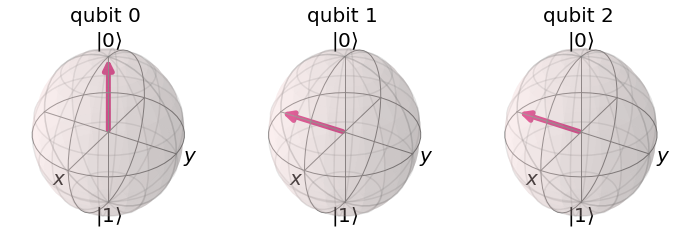

In [5]:
from qiskit.visualization import plot_bloch_multivector
backend1 = Aer.get_backend('statevector_simulator')
s = execute(tar,backend1,shots=1024).result().get_statevector()
plot_bloch_multivector(s)

In [6]:
n =3
initial_state = [[complex(0,sqrt(3)/2), 1/2],[sqrt(1/2), complex(0, sqrt(1/2))],[complex(0,1/2), sqrt(3)/2]]
def circuitn(param):
    qcn = QuantumCircuit(3*n,n)
    for i in range(n):
        qcn.u3(param[i*3],param[i*3+1],param[i*3+2],i*3+1)
    for i in range(n):
        qcn.initialize(initial_state[i],2+i*3)
    return qcn
def swap_test_costn(qcn):
    qcn1 = QuantumCircuit(3*n,n)
    qcn1 += qcn
    for i in range(n):
        qcn1.h(i*3)
        qcn1.cswap(i*3,i*3+1,i*3+2)
        qcn1.h(i*3)
        qcn1.measure(i*3,i)
    backend = Aer.get_backend('qasm_simulator')
    count = execute(qcn1,backend,shots=1024).result().get_counts()
    a = ''
    for i in range(n):
        a += '0'
    result = count[a]/sum(count.values())
    return - result
def obj_funn(param):
    qcn = circuitn(param)
    
    cost = swap_test_costn(qcn)
    
    return cost

param = np.random.rand(3*n)*pi
optimizer = COBYLA(maxiter=1500)
result = optimizer.optimize(num_vars=3*n, objective_function = obj_funn, initial_point=param)
print(result[1])
tar = circuitn(result[0])

-0.9931640625


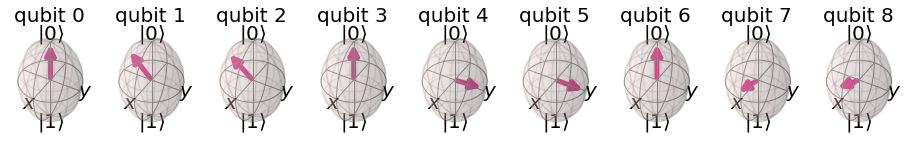

In [7]:
from qiskit.visualization import plot_bloch_multivector
backend1 = Aer.get_backend('statevector_simulator')
s = execute(tar,backend1,shots=1024).result().get_statevector()
plot_bloch_multivector(s)